In [1]:
# Библиоткеи для упражнений
# Необходимо установить недостающие
import numpy as np
from shapely.geometry.polygon import Polygon
from shapely.geometry import Point
import math, random
from sympy import Ray as sRay, Segment as sSegment
from sympy import Point as sPoint
from sympy import intersection
import matplotlib.pyplot as plt
from IPython.display import display
import solutions # устанавливать не нужно

# Принадлежность точки не выпоклому многоугольнику

##  Задача

Задан многоугольник и точка, требуется определить, находится ли заданная точка внутри этого многоугольника.


##  Разминка

Предлагается взглянуть на картинку, на которой изображен многоугольник типа [кривой Пеано](https://ru.wikipedia.org/wiki/Кривая_Пеано), и попытаться ответить на вопрос $-$ красная точка находится внутри или снаружи многоугольника?
<p align="center">
<img src="images/peano.png" width="350"/>
</p>

## Описание алгоритма

#### Идея:
   Провести луч из точки и посчитать количество его пересечений с ребрами многоугольника. 

#### Проблема:
   Луч может пройти через вершину многоугольника. Такой случай надо описать отдельно. Для этого, давайте считать, что ребро $-$ интервал между вершинами, а правая вершина та, у которой координата $x$ больше. 

<p align="center">
<img src="images/out_line.png" width="300"/>
</p>

## Алгоритм

* Мысленно проведем вертикальный луч из данной точки.
* Посчитаем количество пересечений с ребрами многоугольника: 
    Переберем все ребра ($P_1$,$P_2$) по таким правилам $P_{1x}$ $<$ $P_{2x}$: 
    * Если точка $А$ лежит на ребре, то точка лежит в многоугольнике
    * Если у ребра $P_{1x}$ $=$ $P_{2x}$, то это будет вертикально ребро, оно не влияет на           четность, пропускаем его
    * Если у ребра $A_x$ $=$ $P_{2x}$ и $P2_y$ $>$ $A_y$, то увеличим счетчик на $1$
    * Если у ребра $A_x$ $=$ $P_{1x}$, то пропускаем данное ребро
    * Если $P_{1x}$ $<$ $A_x$ $<$ $P_{2x}$ или $P_{2x}$ $<$ $A_x$ $<$ $P_{1x}$ и поворот точек $(P_1,P_2,A)$ левый, то увеличиваем счетчик пересечений на $1$,
* Если количество пересечений четно, то точка лежит вне многоугольника, иначе внутри.

## Время работы
На каждое ребро тратится $O(1)$ времени, при этом мы проходимся по всем ребрам, чтобы проверить, пересекает ли наш луч данное ребро. Значит алгоритм работает за $O(n)$, где $n$ $-$ количество вершин (а значит и ребер) многоугольника.

## Память

Храним список вершин многоугольника, искомую вершину и $O(1)$ памяти для хранения луча, следоватльно требуемая память $O(n)$


## Упражнения

In [1]:
import solutions

## Упражнение 0

* Задача:
    * написать функцию, которая определяет поворот точки относительно прямой, образованной двумя точками
* Формат входных данных:
    * $points$ $-$ массив с вершинами треугольника.
    * вершина задается следующим образом: $[x,y]$, где $x$ и $y$ $-$ координаты вершины
    * $p$ $-$ точка, поворот которой надо проверить
* Формат выходных данных:
    * 1 $-$ слева
    * -1 $-$ справа
    * 0 $-$ лежит на прямой

In [2]:
def turn(points, p):
    # insert your code here...                   
    return 1

turn = solutions.turn

Проверим корректность решения:

* $solutions.test$_$orientation$ тестирует функцию $orientation$
* $solutions.show$_$example$ показывает, что выдает написанный алгоритм на статических тестах, поданных на вход

In [3]:
solutions.test_turn(turn)

passed 50 tests
passed 100 tests
passed 150 tests
All tests passed


## Упражнение 1

* Задача:
    * написать функцию, которая определяет пересекается ли луч с отрезком
    * можно пользоваться поворотом, который уже написан ($solutions.orientation$)
* Формат входных данных:
    * $ray$ $-$ начальная точка, любая точка на луче
    * $segment$ $-$ начальная точка, конечная точка
* Формат выходных данных:
    * $True$ $-$ луч пересекается с отрезком
    * $False$ $-$ иначе

In [4]:
def intersect(ray, segment):
    # insert your code here...                   
    return False

intersect = solutions.intersect

Проверим корректность решения:

* $solutions.test$_$intersect$ тестирует функцию $intersect$
* $solutions.show$_$examples$ показывает, что выдает написанный алгоритм на статических тестах, поданных на вход

In [5]:
solutions.test_intersect(intersect)

passed 50 tests
passed 100 tests
passed 150 tests
All tests passed


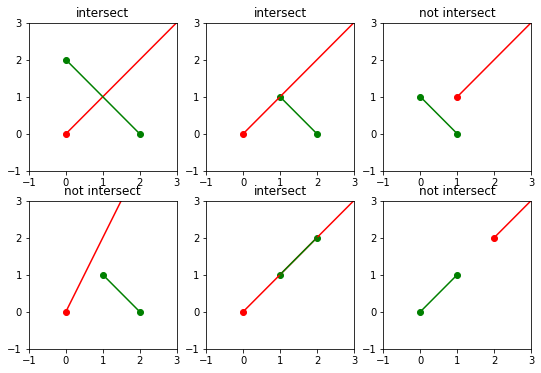

In [6]:
tests = [[[0, 0], [4, 4], [2, 0], [0, 2]],
         [[0, 0], [4, 4], [2, 0], [1, 1]],
         [[1, 1], [4, 4], [1, 0], [0, 1]],
         [[0, 0], [2, 4], [2, 0], [1, 1]],
         [[0, 0], [4, 4], [1, 1], [2, 2]],
         [[2, 2], [4, 4], [0, 0], [1, 1]]]

solutions.show_examples(tests, intersect)

# Упражнение 2

* Задача:
    * дописать функцию проверки принадлежности точки не выпоклому многоугольнику
    * можно пользоваться поворотом, который уже написан ($solutions.orientation$)
* Формат входных данных:
    * $points$ $-$ массив с вершинами треугольника.
    * вершина задается следующим образом: $[x,y]$, где $x$ и $y$ $-$ координаты вершины
    * $point$ точка, принадлежность которой надо проверить
* Формат выходных данных:
    * $True$ $-$ точка внутри многоугольника
    * $False$ $-$ точка снаружи или на границе многоугольника

In [7]:
def check(points, point): 
   flage = 0
   for i in range(-1, len(points) - 1): #для каждого ребра делаем:
       
       if (solutions.isOnSegment(point, [points[i], points[i + 1]])): #если точка на ребре
           return False
        
        # insert your code here...
        
       if (intersect([point,[point[0],point[1] + 1]],[points[i],points[i+1]])): #eсли ребро пересекает луч
           flage = flage + 1
           continue
   return  flage % 2 == 1 #проверка четности счетчика

check = solutions.check

Проверим корректность решения:

* $solutions.test$ тестирует функцию $check$
* тест с неправильным результатом будет изображон на картинке
* $solutions.show$_$test$ показывает, что выдает написанный алгоритм на статических тестах, поданных на вход

In [8]:
solutions.test(check)

passed 50 tests
passed 100 tests
passed 150 tests
All tests passed


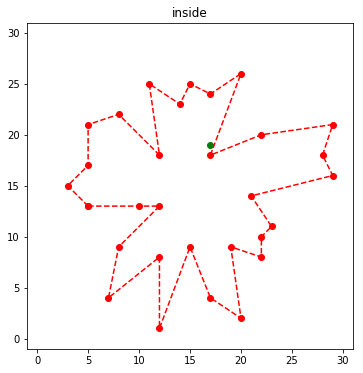

In [9]:
test=[[(5, 13), (10, 13), (12, 13), (8, 9), (7, 4), (12, 8), (12, 1), (15, 9), (17, 4), (20, 2), (19, 9), (22, 8), (22, 10), (23, 11), (21, 14), (29, 16), (28, 18), (29, 21), (22, 20), (17, 18), (20, 26), (17, 24), (15, 25), (14, 23), (11, 25), (12, 18), (8, 22), (5, 21), (5, 17), (3, 15)],
     [17, 19]]

solutions.show_test(test,check)